In [0]:
# Benjamin Alterman and Pravina Pidikiti

In [2]:
# Basic imports

%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [0]:
# Dataset is Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle and UCI Machine Learning
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#

url = 'https://raw.githubusercontent.com/benalterman/Data-Science-Final/master/data.csv'
df = pd.read_csv(url)

In [14]:
# Data cleaning

df.fillna(0)

df.diagnosis[df.diagnosis == 'M'] = .5
df.diagnosis[df.diagnosis == 'B'] = 0

a = df.drop(['id'], axis=1)

a.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0.5,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,0.5,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,0.5,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,0.5,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,0.5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
# Convert pandas dataframe to numpy array
data = a.to_numpy()
data1 = data[:, :30]

print(data1)

[[0.5 17.99 10.38 ... 0.7119 0.2654 0.4601]
 [0.5 20.57 17.77 ... 0.2416 0.18600000000000003 0.275]
 [0.5 19.69 21.25 ... 0.4504 0.243 0.3613]
 ...
 [0.5 16.6 28.08 ... 0.3403 0.1418 0.2218]
 [0.5 20.6 29.33 ... 0.9387 0.265 0.4087]
 [0 7.76 24.54 ... 0.0 0.0 0.2871]]


In [0]:
# Prepare variables for analysis

diag = data1[:, 0]
radius_mean = data1[:, 1]
texture_mean = data[:, 2]
perimeter_mean = data1[:, 3]
area_mean = data1[:, 4]
smoothness_mean = data1[:, 5]

In [0]:
# Import Sklearn

from sklearn.linear_model import LinearRegression

mse = 0.027295478663477157


Text(0, 0.5, 'Diagnosis')

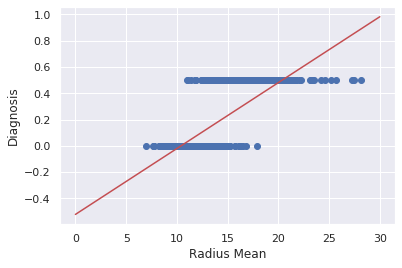

In [18]:
# Radius Mean Graph

model = LinearRegression(fit_intercept=True)
model.fit(radius_mean[:, None], diag)

yp = model.predict(radius_mean[:, None])
print('mse =', np.mean((yp-diag)**2))

scatter(radius_mean, diag)
xfit = np.linspace(0, 30)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Radius Mean')
plt.ylabel('Diagnosis')

mse = 0.05071584085645591


Text(0, 0.5, 'Diagnosis')

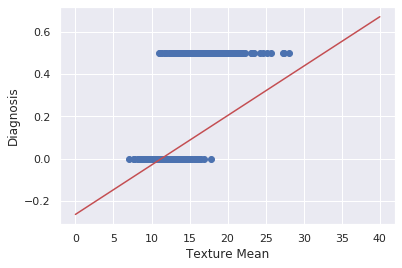

In [9]:
# Texture Mean Graph
model = LinearRegression(fit_intercept=True)
model.fit(texture_mean[:, None], diag)

yp = model.predict(radius_mean[:, None])
print('mse =', np.mean((yp-diag)**2))

scatter(radius_mean, diag)
xfit = np.linspace(0, 40)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Texture Mean')
plt.ylabel('Diagnosis')

mse = 0.38127675508736364


Text(0, 0.5, 'Diagnosis')

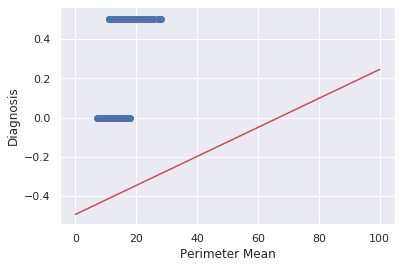

In [10]:
# Perimeter Mean Graph
model = LinearRegression(fit_intercept=True)
model.fit(perimeter_mean[:, None], diag)

yp = model.predict(radius_mean[:, None])
print('mse =', np.mean((yp-diag)**2))

scatter(radius_mean, diag)
xfit = np.linspace(0, 100)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Perimeter Mean')
plt.ylabel('Diagnosis')

mse = 0.15539934330259977


Text(0, 0.5, 'Diagnosis')

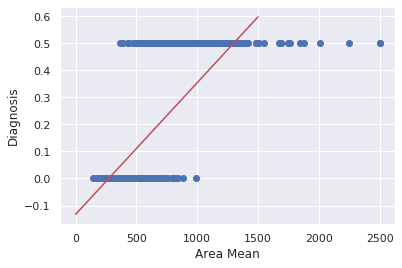

In [11]:
# Area Mean Graph
model = LinearRegression(fit_intercept=True)
model.fit(area_mean[:, None], diag)

yp = model.predict(radius_mean[:, None])
print('mse =', np.mean((yp-diag)**2))

scatter(area_mean, diag)
xfit = np.linspace(0, 1500)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Area Mean')
plt.ylabel('Diagnosis')

mse = 7955.383595647786


Text(0, 0.5, 'Diagnosis')

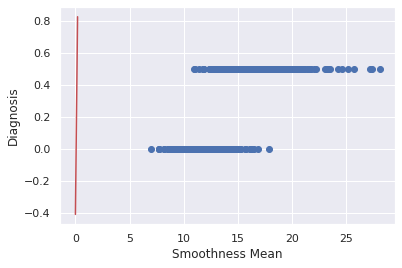

In [12]:
# Smoothness Mean Graph
model = LinearRegression(fit_intercept=True)
model.fit(smoothness_mean[:, None], diag)

yp = model.predict(radius_mean[:, None])
print('mse =', np.mean((yp-diag)**2))

scatter(radius_mean, diag)
xfit = np.linspace(0, .2)
yfit = model.predict(xfit[:, None])
plot(xfit, yfit, 'r')
plt.xlabel('Smoothness Mean')
plt.ylabel('Diagnosis')

mse = 0.013268685876730154



Text(0, 0.5, 'Actual Diagnosis')

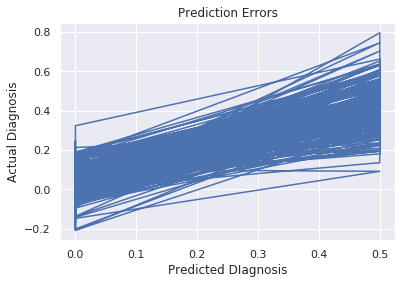

In [29]:
# Predict Diagnosis from all variables

data2 = data1

x = data2[:, 1:30]
y = data2[:, 0]


model2 = LinearRegression(fit_intercept=True)
model2.fit(x, y)
yp = model2.predict(x)
print('mse =', np.mean((yp-y)**2))
print()

plot(y,yp)
plt.title('Prediction Errors')
plt.xlabel('Predicted DIagnosis')
plt.ylabel('Actual Diagnosis')